In [73]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [74]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [75]:
plt.style.use('seaborn')

[]

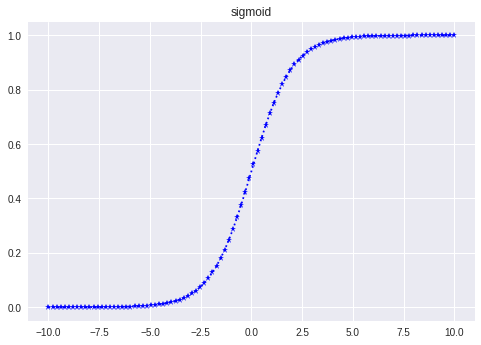

In [76]:
#Draw sigmoid function
x=np.linspace(-10,10,100)
z = 1/(1+np.exp(-x))
plt.plot(x,z,':*b')
plt.title('sigmoid')
plt.plot()

**Exercise 1**

In [77]:
fb_stock = pd.read_csv('/content/fb_stock_prices_2018.csv')
fb_stock.head()

,date,open,high,low,close,volume
0,2018-01-02,177.68,181.58,177.5500,181.42,18151903
1,2018-01-03,181.88,184.78,181.3300,184.67,16886563
2,2018-01-04,184.90,186.21,184.0996,184.33,13880896
3,2018-01-05,185.59,186.90,184.9300,186.85,13574535
4,2018-01-08,187.20,188.90,186.3300,188.28,17994726


In [78]:
fb_stock = fb_stock.assign(week = pd.DatetimeIndex(fb_stock.date).week)
fb_stock.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """Entry point for launching an IPython kernel.


,date,open,high,low,close,volume,week
0,2018-01-02,177.68,181.58,177.5500,181.42,18151903,1
1,2018-01-03,181.88,184.78,181.3300,184.67,16886563,1
2,2018-01-04,184.90,186.21,184.0996,184.33,13880896,1
3,2018-01-05,185.59,186.90,184.9300,186.85,13574535,1
4,2018-01-08,187.20,188.90,186.3300,188.28,17994726,2


In [79]:
stock_diff = fb_stock.groupby('week').agg({'high':max,'low':min})
stock_diff.head()

,high,low
week,,
1,186.90,129.95
2,188.90,177.40
3,182.37,175.80
4,190.66,180.41
5,195.32,181.84


In [80]:
stock_diff = stock_diff.assign(different = stock_diff.high - stock_diff.low)
stock_diff.head()

,high,low,different
week,,,
1,186.90,129.95,56.95
2,188.90,177.40,11.50
3,182.37,175.80,6.57
4,190.66,180.41,10.25
5,195.32,181.84,13.48


[]

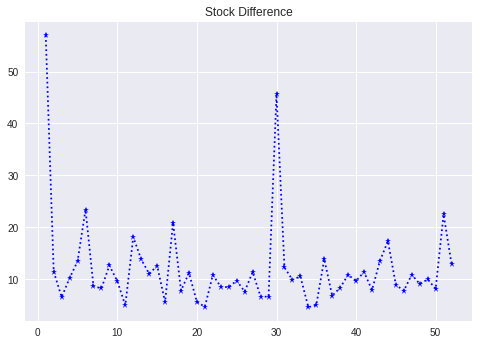

In [81]:
plt.plot(stock_diff.different, ':*b')
plt.title('Stock Difference')
plt.plot()

**Exercise 2**

In [82]:
fb_stock = fb_stock.assign(diffence = stock_diff.different)
fb_stock.head()

,date,open,high,low,close,volume,week,diffence
0,2018-01-02,177.68,181.58,177.5500,181.42,18151903,1,NaN
1,2018-01-03,181.88,184.78,181.3300,184.67,16886563,1,56.95
2,2018-01-04,184.90,186.21,184.0996,184.33,13880896,1,11.50
3,2018-01-05,185.59,186.90,184.9300,186.85,13574535,1,6.57
4,2018-01-08,187.20,188.90,186.3300,188.28,17994726,2,10.25


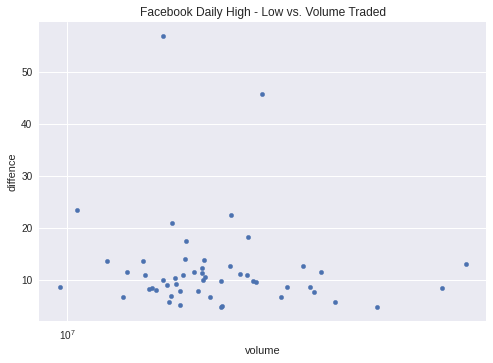

In [83]:
fb_stock.plot(kind='scatter', x='volume', y='diffence', title='Facebook Daily High - Low vs. Volume Traded', logx=True)

**Exercise 3**

In [84]:
earth = pd.read_csv('/content/earthquakes (1).csv')
earth.head()

,mag,magType,time,place,tsunami,parsed_place
0,1.35,ml,1539475168010,"9km NE of Aguanga, CA",0,California
1,1.29,ml,1539475129610,"9km NE of Aguanga, CA",0,California
2,3.42,ml,1539475062610,"8km NE of Aguanga, CA",0,California
3,0.44,ml,1539474978070,"9km NE of Aguanga, CA",0,California
4,2.16,md,1539474716050,"10km NW of Avenal, CA",0,California


In [85]:
earth_indo = earth[earth.parsed_place.str.contains('Indonesia')]
earth_indo

,mag,magType,time,place,tsunami,parsed_place
9,4.7,mb,1539472814760,"219km SSE of Saparua, Indonesia",0,Indonesia
13,4.5,mb,1539470898340,"120km SSW of Banda Aceh, Indonesia",0,Indonesia
180,5.2,mww,1539405255580,"25km E of Bitung, Indonesia",0,Indonesia
421,4.7,mb,1539331098920,"38km SSW of Nggongi Satu, Indonesia",0,Indonesia
660,4.4,mb,1539258833830,"51km WSW of Kasiguncu, Indonesia",0,Indonesia
...,...,...,...,...,...,...
9041,4.3,mb,1537296305750,"7km WSW of Karangsubagan, Indonesia",0,Indonesia
9075,4.4,mb,1537288723310,"103km W of Kuripan, Indonesia",0,Indonesia
9108,4.0,mb,1537280181100,"123km NE of Bitung, Indonesia",0,Indonesia
9209,4.7,mb,1537256021950,"18km NE of Reuleuet, Indonesia",0,Indonesia


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


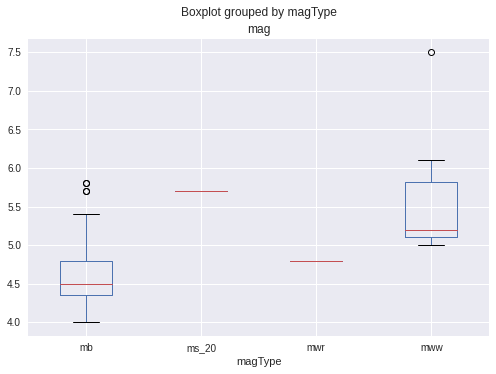

In [86]:
earth_indo.boxplot(column='mag', by='magType')